# King County Housing Prices: A Multiple Regression Analysis

By Brittney Nitta-Lee

The King County Housing Data Set contains information about the size, location, condition, and other features of houses in King County. The goal of this project is to develop a multiple regression model than can predict a house's price as accurately as possible.

# Column Names and descriptions for King County Data Set

-  __id__ - unique identified for a house
-  __date__ - house was sold
-  __price__ - is prediction target
-  __bedrooms__ - number of bedrooms 
-  __bathrooms__ - number of bathrooms
-  __sqft_livingsquare__ - Square footage of the home
-  __sqft_lotsquare__ - Square footage of the lot
-  __floors__ - total floors in house
-  __waterfront__ - homes which has a view to a waterfront
-  __view__ - Quality of view from house
-  __condition__ - How good the condition is ( Overall )
-  __grade__ - overall grade given to the housing unit, based on King County grading system
-  __sqft_above__ - square footage of house apart from basement
-  __sqft_basement__ - square footage of the basement
-  __yr_built__ - Built Year
-  __yr_renovated__ - Year when house was renovated
-  __zipcode__ - zip
-  __lat__ - Latitude coordinate
-  __long__ - Longitude coordinate
-  __sqft_living15__ - The square footage of interior housing living space for the nearest 15 neighbors
-  __sqft_lot15__ - The square footage of the land lots of the nearest 15 neighbors

In [1]:
#import necessary modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.regressionplots import plot_partregress_grid

The first step is loading and previewing the dataframe.

In [2]:
#load and preview data frame
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


The next step is to check the datatypes and shape.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [5]:
df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

In [6]:
df['price'].value_counts().sort_values(ascending=False)

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
455800.0      1
406650.0      1
291970.0      1
324747.0      1
398950.0      1
Name: price, Length: 3622, dtype: int64

In [7]:
df['price'].value_counts().sort_values(ascending=True)

398950.0      1
324747.0      1
291970.0      1
406650.0      1
455800.0      1
           ... 
425000.0    150
500000.0    152
550000.0    159
450000.0    172
350000.0    172
Name: price, Length: 3622, dtype: int64

The dataset, containing more than 21 thousand entries and 20 columns. There's missing data in some categories but we will explore that in the data cleaning proccess section. 

Now it's time to look at the distribution of variables in the dataset.

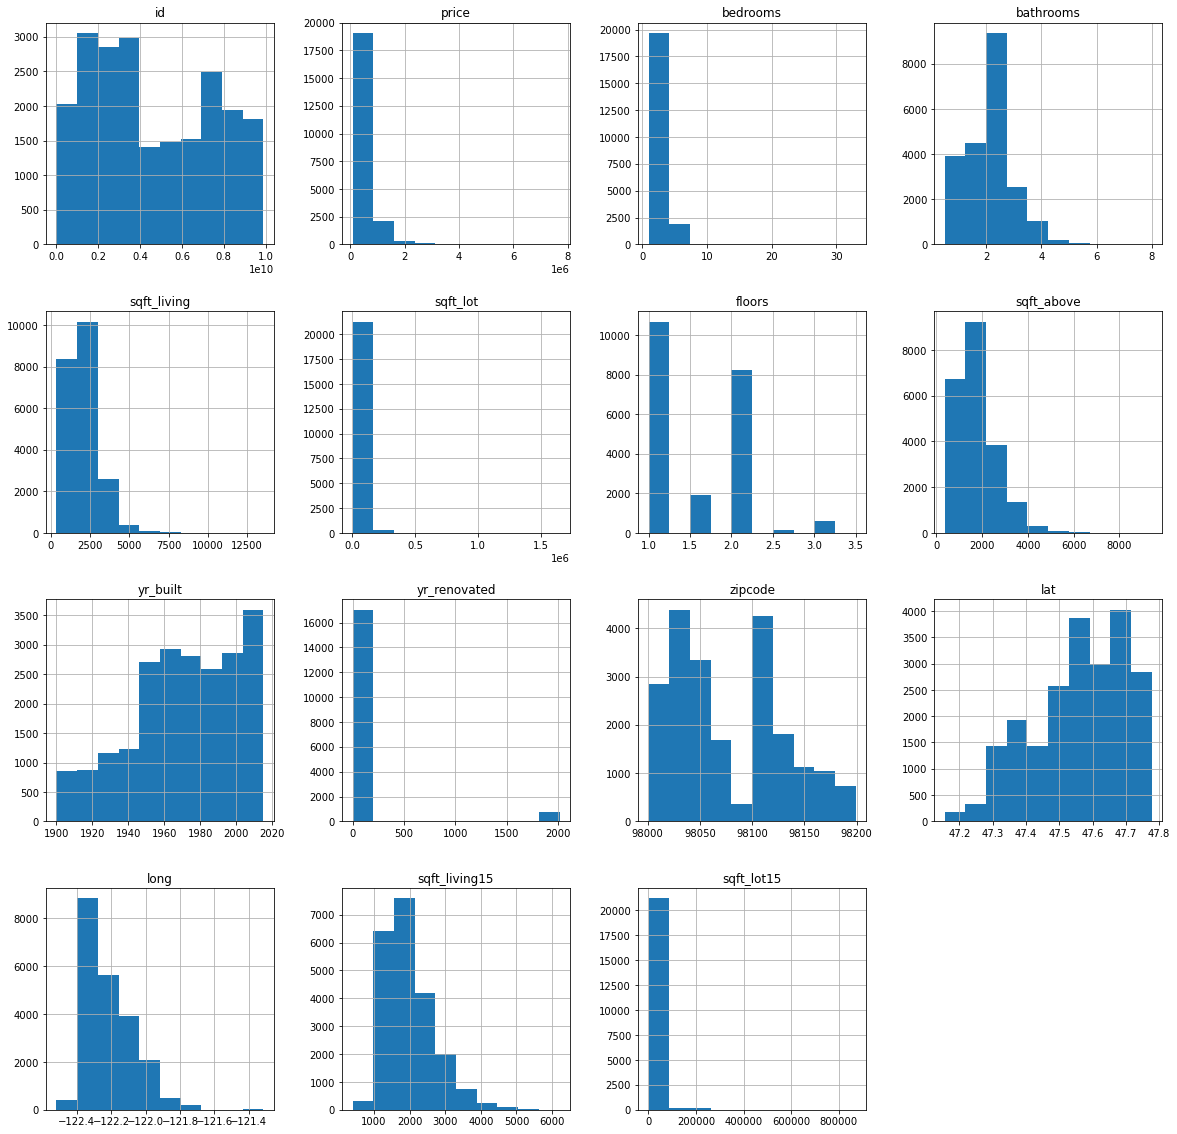

In [8]:
df.hist(figsize=(20,20));

The majority of the variables in the dataset do not follow a normal distribution. There could be a few reasons, such as outliers or insufficient data. 

<h1> Data Cleaning </h1>

It's time to look at the missing data for each columns. The columns with missing data are Waterfront, View and Year Renovated. 

In [9]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [10]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [11]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [12]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

The building grade of each house has an interesting rating. Below you'll find the definition of the grade of each house. I want to incorporate these into my project.

According to the <a href="https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r">King County Glossary of Terms</a> Building grade is defined as: 
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1. Falls short of minimum building standards. Normally cabin or inferior structure.

2. Falls short of minimum building standards. Normally cabin or inferior structure.

3. Falls short of minimum building standards. Normally cabin or inferior structure.

4. Generally older, low quality construction. Does not meet code.

5. Low construction costs and workmanship. Small, simple design.

6. Lowest grade currently meeting building code. Low quality materials and simple designs.

7. Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8. Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9. Better architectural design with extra interior and exterior design and quality.

10. Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11. Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12. Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13. Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

Since 1 to 3 is in the same category, I will create the building grades from numbers 3 through 11. I will start with 3 instead of 1 because the value counts start at 3 as poor.

In [13]:
#label encoding grade to numbers
df['grade'] = df['grade'].replace(
    to_replace =['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', 
                 '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'],
    value = [3,4,5,6,7,8,9,10,11,12,13])

In [14]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

Much better! It's good to know that there's only one house with a Building Grade of 3. Since I'm focusing on all houses in this data set, I will keep it as is.

Let's take a look at the column called condition.

In [15]:
df['condition'].describe()

count       21597
unique          5
top       Average
freq        14020
Name: condition, dtype: object

In [16]:
df['condition'].nunique()

5

In [17]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

Looks the like values range from 1 to 5. Since I am using the condition in my regression model, the column needs to be on a numerical scale.

In [18]:
#label encoding condition to numbers
df['condition'] = df['condition'].replace(
    to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
    value=[1,2,3,4,5])

In [19]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

For my analysis, since the data for Waterfront, View, and Year renovated contains missing data and is not needed, we can drop those columns. Also, as a resident of King County, a home with either a waterfront or a view is rare. 

In [20]:
#drop year renovated column
df.drop('yr_renovated', axis=1, inplace=True)

In [21]:
#drop waterfront column
df.drop('waterfront', axis=1, inplace=True)

In [22]:
#drop view column
df.drop('view', axis=1, inplace=True)

In [23]:
#change price type to int
df = df.astype({'price':'int'})
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


### Categorical Variables

Since the price column is the dependent variable for this project, I want to see how other columns affect the price. Let's take a look at the dataset one more time. The categorical columns are condition and grade. 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

In [25]:
#OHE 
cat_var = ['condition', 'grade']
df_processed = pd.get_dummies(
    df, prefix=cat_var, columns=cat_var, drop_first=True)

In [26]:
df_processed.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,1180,0.0,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,2170,400.0,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,770,0.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,1050,910.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,1680,0.0,...,0,0,0,0,1,0,0,0,0,0


Great! Now we can move on and use these for our linear regression model. 

In [27]:
df_processed.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,1180,0.0,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,2170,400.0,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,770,0.0,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,1050,910.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,1680,0.0,...,0,0,0,0,1,0,0,0,0,0


### Question 1: Which features are most highly correlated with price?

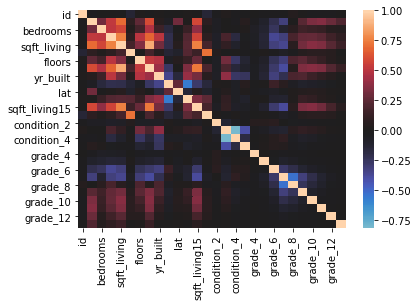

In [28]:
sns.heatmap(df_processed.corr(), center=0);

It seems like sqft_living, bathrooms, sqft_above, and condition are highly correlated among each other. While the condition of the home and sqft living are highly correlated with price.

### Pairplot

Let's see if the variables have a linear relationship with our house price. 

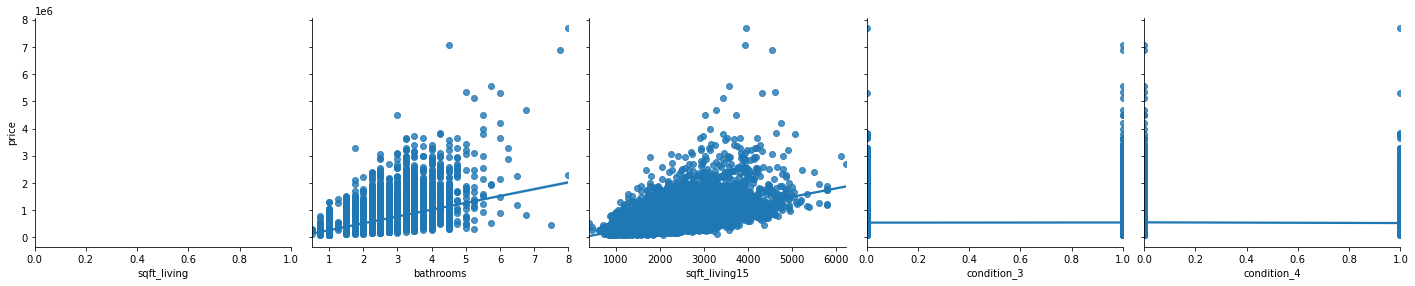

In [29]:
sns.pairplot(df_processed, 
             x_vars=["sqft_living","bathrooms","sqft_living15", "condition_3", "condition_4"],
             y_vars="price",
             kind ='reg',
             height = 4)

### Run the multiple regression

In [30]:
Model_1 = smf.ols(formula="price ~ condition_3 + condition_4 + bathrooms + sqft_living15  + sqft_living", data=df_processed).fit()
Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     4434.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        07:46:19   Log-Likelihood:            -2.9976e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21591   BIC:                         5.996e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.692e+04   8019.487     -3.357      0.001   -4.26e+04   -1.12e+04
condition_3   -1.043e+05   6357.139    -16.401      0.000   -1.17e+05   -9.18e+04
condition_4   -6.604e+04   6851.158     -9.640      0.000   -7.95e+04   -5.26e+04
bathrooms      3209.5992   3543.538      0.906      0.365   -3735.998    1.02e+04
sqft_living15    73.1732      3.929     18.622      0.000      65.471      80.875
sqft_living     240.3983      3.684     65.259      0.000     233.178     247.619
==============================================================================
Omnibus:                    15670.814   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           708449.398
Skew:                           3.003   Prob(JB):                         0.00
Kurtosis:                      30.408   Cond. No.                     1.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared is 0.507, which shows that a home's condition, bathrooms, sqft_living, and sqft_living15 contribute 50.7% to the variability of a home's value. The remaining percentage of the variation is unaccounted for by the model. The p-value for bathrooms indicates 0.40, but the rest are zero, which means we can reject the null hypothesis. Also, the coefficients are very high, which shows that there is strong multicollinearity.

## Question 2: Which feature has the strongest correlation with the value of a home?

### Identify Multicollinearity

We need to identify which predictor variables are highly correlated with each other and remove some variables as we build our model.

In [31]:
#Drop price column to look at relationships between predictors
predict = df_processed.drop('price', axis=1)
corr_predictors = predict.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_predictors['pairs'] = list(zip(corr_predictors.level_0, corr_predictors.level_1))
corr_predictors.set_index(['pairs'], inplace=True)
corr_predictors.drop(columns=['level_1', 'level_0'], inplace=True)
corr_predictors.columns = ['correlations']
corr_predictors[(corr_predictors.correlations > .75) & (corr_predictors.correlations <1)]

,correlations
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living, sqft_above)",0.876448
"(condition_4, condition_3)",0.812294
"(condition_3, condition_4)",0.812294
"(sqft_living15, sqft_living)",0.756402
"(sqft_living, sqft_living15)",0.756402
"(sqft_living, bathrooms)",0.755758
"(bathrooms, sqft_living)",0.755758


### Linear Regression Model

Next, I'll create a simple linear regression model for each of the chose condition, sqft_living, sqft_living15 and bathrooms that satisfy linearity, and test the assumptions for each. But, before we do that, I will need to do some statistical tests to do the linear regression. 

Before building the simple linear regression model, here's what needs to be checked: 
- Residuals must follow a normal distribution
- Residuals are homoscedasticity
- There's no multicolinearity between the independent variables
<br><i><a href="https://towardsdatascience.com/all-the-statistical-tests-you-must-do-for-a-good-linear-regression-6ec1ac15e5d4">Gustavo Santos, All Statistical Tests You Must do For a Good Linear Regression</i></br></a>

### Train-Test Split

To avoid data leakage, let's do a train-test split. The reason to peform a train-test split is to see how well the model is likely to peform on new data. 
I will arrange the data into features and target. In this case, we focus on sqft_living, bathrooms, and sqft_living15. Our target is the value of a home. The train-test split takes 75% of the data as the training subset and the other 25% as its test subset. In this case, I will set the test_size to 0.20, so 20% of the data is used for testing, and 80% is for training.

In [32]:
#set the y and x inputs 
features = ['bathrooms','sqft_living','sqft_living15']
X = df_processed.loc[:, features]
y = df_processed.loc[:, ['price']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform a log transformation on the training set
X_train_log = np.log(X_train)

# Apply the same transformation to the test set
X_test_log = np.log(X_test)

# Perform a log transformation on the y_train set
y_train_log = np.log(y_train)

# Apply the same transformation to the y_test set
y_test_log = np.log(y_test)

In [33]:
# Compute the correlation coefficients between the transformed features and target variable
df_train = pd.concat([X_train_log, y_train], axis=1)
corr_matrix = df_train.corr()
corr_price = corr_matrix['price'].abs().sort_values(ascending=False)

# Print the correlation coefficients in descending order
print(corr_price)

price            1.000000
sqft_living      0.611735
sqft_living15    0.541432
bathrooms        0.456513
Name: price, dtype: float64


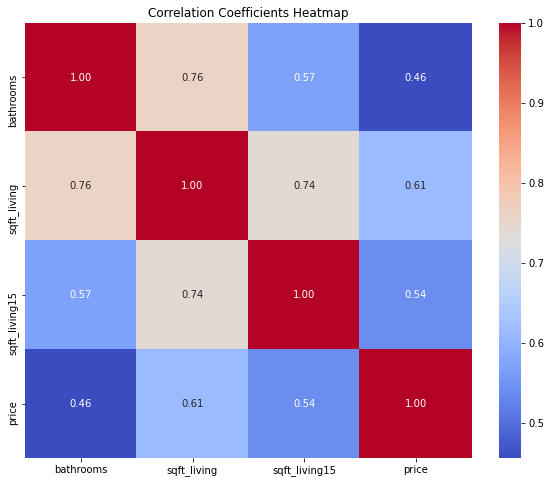

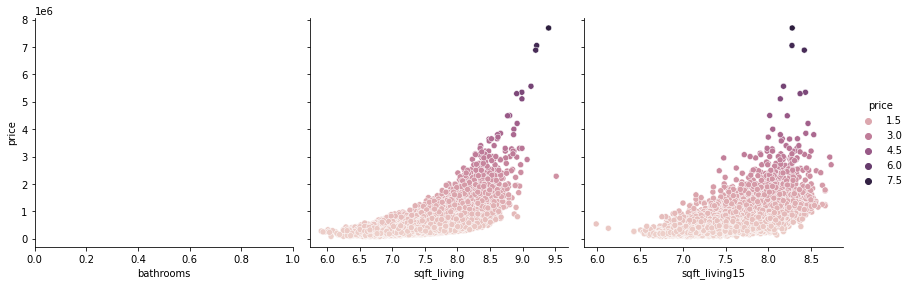

In [34]:
# Compute the correlation coefficients between the transformed features and target variable
df_train = pd.concat([X_train_log, y_train], axis=1)
corr_matrix = df_train.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Coefficients Heatmap')
plt.show()

# Plot a scatter plot matrix of the transformed features and target variable
sns.pairplot(df_train, x_vars=['bathrooms', 'sqft_living', 'sqft_living15'], y_vars=['price'], height=4, hue ='price')
plt.show()

The heatmap and the scatterplot matrix of the correlation coefficients between the value of a home and features (bathrooms, sqft_living, and sqft_living15, help visualize the relationships between the variables. According to the correlation coefficients, sqft_living has the most substantial linear relationship with price, while the number of bathrooms is the lowest.

### Sqft_Living

Text(0.5, 1.0, 'Linearity and Homscedasticity check')

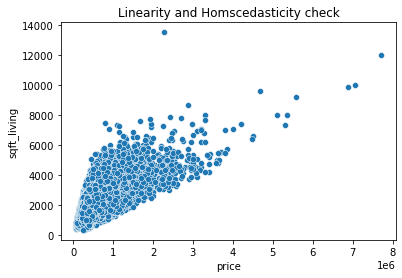

In [35]:
#check for linearity
sns.scatterplot(x=df_processed['price'], y=df_processed['sqft_living'])
plt.title("Linearity and Homscedasticity check")

In [36]:
#create predictors
predictors = df_processed['sqft_living']
predictors_int = sm.add_constant(predictors)
baseline_model = sm.OLS(df_processed['price'], predictors_int).fit()
baseline_model.params

const         -43988.892194
sqft_living      280.863014
dtype: float64

### Log Transformation Sqft_Living

In [37]:
#logarithmic function to independent variable
df_processed['price'] = np.log(df_processed['price'])
df_processed['sqft_living'] = np.log(df_processed['sqft_living'])
predictors = df_processed['sqft_living']
predictors_int = sm.add_constant(predictors)
model_1_log = sm.OLS(df_processed['price'], predictors_int).fit()
print(model_1_log.params)
model_1_log.summary()

const          6.723413
sqft_living    0.837642
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.805e+04
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        07:46:21   Log-Likelihood:                -10231.
No. Observations:               21597   AIC:                         2.047e+04
Df Residuals:                   21595   BIC:                         2.048e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7234      0.047    142.612      0.000       6.631       6.816
sqft_living     0.8376      0.006    134.368      0.000       0.825       0.850
==============================================================================
Omnibus:                      123.577   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.096
Skew:                           0.143   Prob(JB):                     1.68e-25
Kurtosis:                       2.787   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Sqft Living 15

Text(0.5, 1.0, 'Linearity and Homscedasticity check')

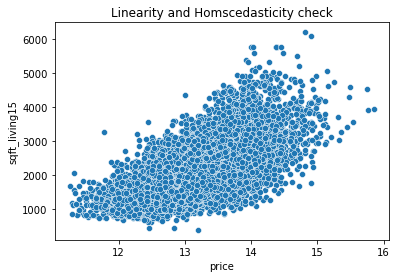

In [38]:
#check for linearity
sns.scatterplot(x=df_processed['price'], y=df_processed['sqft_living15'])
plt.title("Linearity and Homscedasticity check")

In [39]:
#create predictors
predictors = df_processed['sqft_living15']
predictors_int = sm.add_constant(predictors)
model_2 = sm.OLS(df_processed['price'], predictors_int).fit()
model_2.params

const            12.102756
sqft_living15     0.000476
dtype: float64

In [40]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.344e+04
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        07:46:21   Log-Likelihood:                -11568.
No. Observations:               21597   AIC:                         2.314e+04
Df Residuals:                   21595   BIC:                         2.316e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.1028      0.009   1402.771      0.000      12.086      12.120
sqft_living15     0.0005   4.11e-06    115.918      0.000       0.000       0.000
==============================================================================
Omnibus:                      393.426   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              452.474
Skew:                           0.286   Prob(JB):                     5.58e-99
Kurtosis:                       3.418   Cond. No.                     6.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Log Transformation Sqft Living 15

In [41]:
df_processed['sqft_living15'] = np.log(df_processed['sqft_living15'])
predictors = df_processed['sqft_living15']
predictors_int = sm.add_constant(predictors)
model_2_log = sm.OLS(df_processed['price'], predictors_int).fit()
print(model_2_log.params)
model_2_log.summary()

const            5.687551
sqft_living15    0.976280
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                 1.261e+04
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        07:46:21   Log-Likelihood:                -11826.
No. Observations:               21597   AIC:                         2.366e+04
Df Residuals:                   21595   BIC:                         2.367e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.6876      0.066     86.683      0.000       5.559       5.816
sqft_living15     0.9763      0.009    112.289      0.000       0.959       0.993
==============================================================================
Omnibus:                      407.138   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.501
Skew:                           0.288   Prob(JB):                    9.19e-104
Kurtosis:                       3.442   Cond. No.                         177.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Bathrooms

Text(0.5, 1.0, 'Linearity and Homscedasticity check')

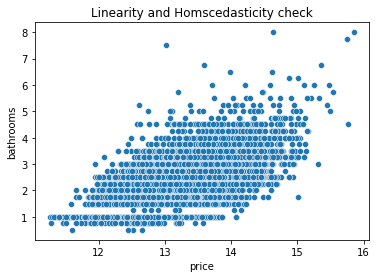

In [42]:
#check for linearity
sns.scatterplot(x=df_processed['price'], y=df_processed['bathrooms'])
plt.title("Linearity and Homscedasticity check")

In [43]:
#create predictors
predictors = df_processed['bathrooms']
predictors_int = sm.add_constant(predictors)
model_3 = sm.OLS(df_processed['price'], predictors_int).fit()
model_3.params

const        12.249565
bathrooms     0.377463
dtype: float64

In [44]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     9427.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        07:46:21   Log-Likelihood:                -12880.
No. Observations:               21597   AIC:                         2.576e+04
Df Residuals:                   21595   BIC:                         2.578e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2496      0.009   1399.614      0.000      12.232      12.267
bathrooms      0.3775      0.004     97.092      0.000       0.370       0.385
==============================================================================
Omnibus:                      191.594   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.538
Skew:                           0.232   Prob(JB):                     2.10e-43
Kurtosis:                       3.063   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
Model_multiple_regression = smf.ols(formula="price ~ sqft_living + bathrooms", data=df_processed).fit()
Model_multiple_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     9146.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        07:46:21   Log-Likelihood:                -10166.
No. Observations:               21597   AIC:                         2.034e+04
Df Residuals:                   21594   BIC:                         2.036e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.2255      0.064    112.174      0.000       7.099       7.352
sqft_living     0.7542      0.010     78.563      0.000       0.735       0.773
bathrooms       0.0604      0.005     11.401      0.000       0.050       0.071
==============================================================================
Omnibus:                      138.807   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.260
Skew:                           0.150   Prob(JB):                     2.32e-28
Kurtosis:                       2.774   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at the linear regression model above, sqft_living and bathrooms has a R-squared of 45%. 

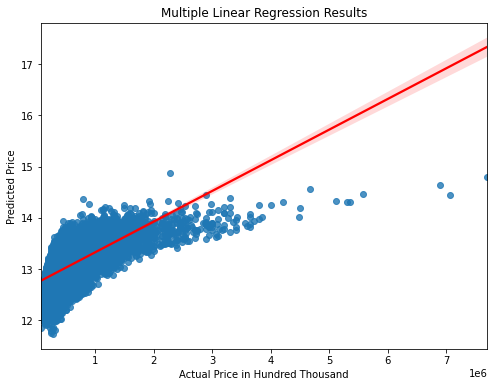

In [46]:
# Generate the predicted values
y_pred = Model_multiple_regression.predict(df_processed[['sqft_living', 'bathrooms']])

# Set the figure size
plt.figure(figsize=(8,6))

# Create a scatter plot of the actual vs. predicted values
sns.regplot(x=df['price'], y=y_pred, line_kws={'color': 'red'})
plt.xlabel('Actual Price in Hundred Thousand')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression Results')
plt.show()

It looks like there's a clustering of data points and is more linear than curved. Looking at the OLS Regression Results shows a strong correlation between sqft_living and price. The correlation coefficient with bathrooms and price is below 1, which doesn't display a strong relationship. 

### Question 3: Does grade or condition of a house contribute to the value of a home?

Now that we see sqft_living has the strongest linear relationship with price, let's take a look at the grade and condition of a home.

In [47]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   sqft_above     21597 non-null  int64  
 9   sqft_basement  21597 non-null  object 
 10  yr_built       21597 non-null  int64  
 11  zipcode        21597 non-null  int64  
 12  lat            21597 non-null  float64
 13  long           21597 non-null  float64
 14  sqft_living15  21597 non-null  float64
 15  sqft_lot15     21597 non-null  int64  
 16  condition_2    21597 non-null  uint8  
 17  condition_3    21597 non-null  uint8  
 18  condit

So we have grade 4 through 13 and condition 2 through 5. Let's create add grade and condition to sqft_living model. 

In [48]:
predictors = df_processed[['sqft_living', 'grade_4', 'grade_5', 'grade_6','grade_7','grade_8','grade_9','grade_10','grade_11',
                          'grade_12','grade_13','condition_2','condition_3','condition_4','condition_5']]
predictors_int = sm.add_constant(predictors)
model_4 = sm.OLS(df_processed['price'], predictors_int).fit()
print(model_4.params)
model_4.summary()

const          9.701349
sqft_living    0.408623
grade_4       -0.194210
grade_5       -0.213227
grade_6       -0.074592
grade_7        0.079652
grade_8        0.284922
grade_9        0.529387
grade_10       0.762344
grade_11       1.004985
grade_12       1.299177
grade_13       1.694071
condition_2   -0.113657
condition_3   -0.010849
condition_4    0.074651
condition_5    0.219294
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     1880.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        07:46:26   Log-Likelihood:                -7764.9
No. Observations:               21597   AIC:                         1.556e+04
Df Residuals:                   21581   BIC:                         1.569e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.7013      0.357     27.200      0.000       9.002      10.400
sqft_living     0.4086      0.008     48.658      0.000       0.392       0.425
grade_4        -0.1942      0.353     -0.550      0.583      -0.887       0.498
grade_5        -0.2132      0.348     -0.613      0.540      -0.895       0.468
grade_6        -0.0746      0.347     -0.215      0.830      -0.755       0.606
grade_7         0.0797      0.347      0.230      0.818      -0.601       0.760
grade_8         0.2849      0.347      0.821      0.412      -0.395       0.965
grade_9         0.5294      0.347      1.524      0.127      -0.151       1.210
grade_10        0.7623      0.347      2.194      0.028       0.081       1.443
grade_11        1.0050      0.348      2.889      0.004       0.323       1.687
grade_12        1.2992      0.349      3.718      0.000       0.614       1.984
grade_13        1.6941      0.361      4.696      0.000       0.987       2.401
condition_2    -0.1137      0.070     -1.627      0.104      -0.251       0.023
condition_3    -0.0108      0.065     -0.167      0.867      -0.138       0.116
condition_4     0.0747      0.065      1.149      0.251      -0.053       0.202
condition_5     0.2193      0.065      3.355      0.001       0.091       0.347
==============================================================================
Omnibus:                       60.891   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.268
Skew:                           0.128   Prob(JB):                     4.96e-14
Kurtosis:                       2.948   Cond. No.                     3.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

If we take a look at the p-values for grade_4 through grade_9 it's more than 0.05 which shows the null hypothesis cannot be rejects since the level of significance is 0.05. It's telling me that there's no relationship between the independent and dependent variable. Therefore, it will be left out. 

In [49]:
predictors = df_processed[['sqft_living', 'grade_10','grade_11','grade_12','grade_13','condition_5']]
predictors_int = sm.add_constant(predictors)
model_5 = sm.OLS(df_processed['price'], predictors_int).fit()
print(model_5.params)
model_5.summary()

const          7.679624
sqft_living    0.704903
grade_10       0.375786
grade_11       0.551603
grade_12       0.783878
grade_13       1.085741
condition_5    0.155569
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     3647.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        07:46:26   Log-Likelihood:                -9234.0
No. Observations:               21597   AIC:                         1.848e+04
Df Residuals:                   21590   BIC:                         1.854e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.6796      0.050    152.139      0.000       7.581       7.779
sqft_living     0.7049      0.007    104.820      0.000       0.692       0.718
grade_10        0.3758      0.012     30.948      0.000       0.352       0.400
grade_11        0.5516      0.020     28.056      0.000       0.513       0.590
grade_12        0.7839      0.040     19.551      0.000       0.705       0.862
grade_13        1.0857      0.103     10.501      0.000       0.883       1.288
condition_5     0.1556      0.009     16.580      0.000       0.137       0.174
==============================================================================
Omnibus:                      100.507   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.363
Skew:                           0.092   Prob(JB):                     4.79e-19
Kurtosis:                       2.755   Cond. No.                         313.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This looks better. All P-values are 0 and shows that there is a significant relationship between the variables being tested. The R-squared is telling us that 50% of the variability in the price of the house can be explained by sqft_living, condition_5 and building grade 10 through 13. 

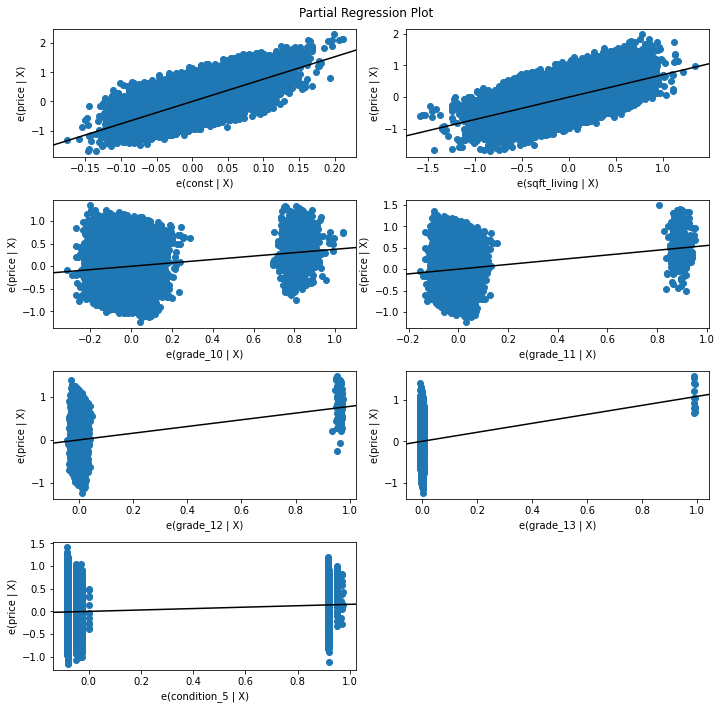

In [50]:
from statsmodels.graphics.regressionplots import plot_partregress_grid

fig = plt.figure(figsize=(10, 10))
plot_partregress_grid(model_5, fig=fig)
plt.show()

The Partial Regression plot shows a linear relationship between sqft_living and price. But, grade and condition don't show linear patterns. Instead, there is a cluster of points on the left and the right, which shows outliers. 
The square footage, grade, and condition contribute to a home's value.

### Conclusion

If homeowners can, they should expand the square footage of their homes and build additional bathrooms. Another focus is the grade or construction quality of the house. Homes with higher design quality have more value. And the home's condition should have no signs of damage or repair.

### Limitations 

There was a lot of preprocessing and variables. We had to perform log transformations on variables to satisfy regression assumptions. Therefore, the model may not accurately predict a home's value. Future analysis could include looking at data in other counties and using an updated dataset.